In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()
import warnings
warnings.filterwarnings('ignore')

# Load The Dataset

In [2]:
data = pd.read_csv('names\yob1880.txt',encoding='utf-8',engine='python',names=['name','sex','birth'])
data.head()

,name,sex,birth
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


print total male and female birth in year 1880

In [3]:
data.groupby('sex').birth.sum()

sex
F     90994
M    110490
Name: birth, dtype: int64

concatenate dataset

In [4]:
years = range(1880,2022)
arr =[]
columns = ['name','sex','birth']
for year in years:
    path ='names\yob%d.txt' % year
    frame = pd.read_csv(path,names=columns)

    frame['year']=year
    arr.append(frame)

df_name =pd.concat(arr,ignore_index=True)
df_name

,name,sex,birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2052776,Zyeire,M,5,2021
2052777,Zyel,M,5,2021
2052778,Zyian,M,5,2021
2052779,Zylar,M,5,2021


print total birth of male & female in each year

In [5]:
total_birth =df_name.pivot_table('birth',index='year',columns='sex',aggfunc=sum)

In [6]:
total_birth.head()

sex,F,M
year,,
1880,90994,110490
1881,91953,100737
1882,107847,113686
1883,112319,104625
1884,129019,114442


In [7]:
total_birth.tail()

sex,F,M
year,,
2017,1723043,1847191
2018,1696917,1811738
2019,1673030,1788414
2020,1609171,1718248
2021,1627098,1734277


Visualize 'total birth by sex and year'

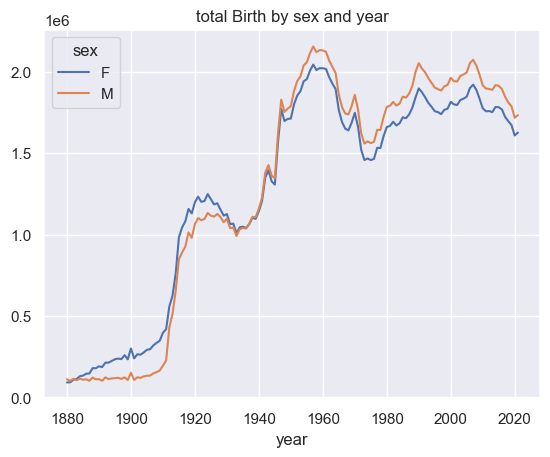

In [8]:
total_birth.plot(title='total Birth by sex and year')
plt.show()

Display a table to print percentage of baby name in each year

In [9]:
def add_pname(popular_name):
    popular_name['Popular_name'] = ((popular_name.birth/popular_name.birth.sum())*100)
    return popular_name

df_name = df_name.groupby(['year','sex']).apply(add_pname)
df_name

,name,sex,birth,year,Popular_name
0,Mary,F,7065,1880,7.764248
1,Anna,F,2604,1880,2.861727
2,Emma,F,2003,1880,2.201244
3,Elizabeth,F,1939,1880,2.130910
4,Minnie,F,1746,1880,1.918808
...,...,...,...,...,...
2052776,Zyeire,M,5,2021,0.000288
2052777,Zyel,M,5,2021,0.000288
2052778,Zyian,M,5,2021,0.000288
2052779,Zylar,M,5,2021,0.000288


In [10]:
def top_name(popular_name):
    return popular_name.sort_values(by='birth',ascending=False)[:10]
p_name=df_name.groupby(['sex','birth'])
top_100=p_name.apply(top_name)
top_100.reset_index(inplace=True,drop=True)

Analysing naming Trends

In [11]:
boy_name = top_100[top_100.sex == 'M']
girl_name = top_100[top_100.sex == 'F']
total_birth = top_100.pivot_table('birth', index = 'year', columns = 'name', aggfunc = sum)

In [12]:
boy_name.head()

,name,sex,birth,year,Popular_name
35657,Ab,M,5,1880,0.004525
35658,Leonaldo,M,5,2002,0.000258
35659,Kyseem,M,5,2002,0.000258
35660,Kyrus,M,5,2002,0.000258
35661,Kymir,M,5,2002,0.000258


In [13]:
girl_name.head()

,name,sex,birth,year,Popular_name
0,Adelle,F,5,1880,0.005495
1,Shanaz,F,5,2000,0.000275
2,Shaneika,F,5,2000,0.000275
3,Shanequa,F,5,2000,0.000275
4,Shaney,F,5,2000,0.000275
